1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
2. Implement Naive Bayes on your own from scratch for text classification. 
3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files

In [2]:
#exporting th datasets from sklearn
folder_path = '20_newsgroups'
news_data = load_files(folder_path, encoding='utf-8', decode_error='ignore')

In [3]:
x=news_data.data
y=news_data.target

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [5]:
x_train[0].split(' ')

['Newsgroups:',
 'sci.med\nPath:',
 'cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!zaphod.mps.ohio-state.edu!moe.ksu.ksu.edu!osuunx.ucc.okstate.edu!vms.ocom.okstate.edu!banschbach\nFrom:',
 'banschbach@vms.ocom.okstate.edu\nSubject:',
 'Re:',
 'Kidney',
 'Stones\nMessage-ID:',
 '<1993Apr28.144754.1@vms.ocom.okstate.edu>\nLines:',
 '68\nSender:',
 'news@osuunx.ucc.okstate.edu',
 '(USENET',
 'News',
 'System)\nNntp-Posting-Host:',
 'vms.ocom.okstate.edu\nOrganization:',
 'OSU',
 'College',
 'of',
 'Osteopathic',
 'Medicine\nReferences:',
 '<1993Apr28.095305.3587@rose.com>\nDate:',
 'Wed,',
 '28',
 'Apr',
 '1993',
 '20:47:54',
 'GMT\n\nIn',
 'article',
 '<1993Apr28.095305.3587@rose.com>,',
 'ron.roth@rose.com',
 '(ron',
 'roth)',
 'writes:\n>',
 '',
 '',
 '',
 '',
 '',
 'banschbach@vms.ocom.okstate.edu',
 '(Marty',
 'Banschbach)',
 'writes:\n>',
 '[...]\n>',
 'B',
 '>',
 '',
 'Medicine',
 'has',
 'not,',
 'and',
 'probalby',
 'never',
 'will',
 'be,',
 'practiced'

In [6]:
#getv all the word from train datasets
word=[]
for i in range(len(x_train)):
  word.append(x_train[i].split(' '))
len(word)

14997

In [7]:
stop_words = ['a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards',
              'again', 'against', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also'
              'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 
              'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 
              'appropriate', 'are', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 
              'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 
              'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better',
              'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', 'cause', 'causes', 
              'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently',
              'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'course', 
              'currently', 'definitely', 'described', 'despite', 'did', 'different', 'do', 'does', 'doing', 
              'done', 'down', 'downwards', 'during', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 
              'enough', 'entirely', 'especially', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 
              'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth', 'first', 'five', 'followed',
              'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 
              'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 
              'had', 'happens', 'hardly', 'has', 'have', 'having', 'he', 'hello', 'help', 'hence', 'her', 'here', 
              'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 
              'hopefully', 'how', 'however', 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 
              'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'it', 'its', 
              'itself', 'just', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'last', 'lately', 'later', 'latter', 
              'latterly', 'least', 'less', 'lest', 'let', 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 
              'ltd', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 
              'most', 'mostly', 'much', 'must', 'my', 'myself', 'name', 'namely', 'near', 'nearly', 'necessary', 'need', 
              'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 
              'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 
              'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 
              'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'particular', 'particularly', 'per', 
              'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'quite', 'rather', 
              'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'said', 
              'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 
              'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 
              'she', 'should', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 
              'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 
              'such', 'sup', 'sure', 'take', 'taken', 'tell', 'tends', 'than', 'thank', 'thanks', 'thanx', 'that', 'thats', 
              'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 
              'therein', 'theres', 'thereupon', 'these', 'they', 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 
              'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 
              'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 
              'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'value', 'various', 
              'very', 'via', 'viz', 'vs', 'want', 'wants', 'was', 'way', 'we', 'welcome', 'well', 'went', 'were', 'what', 
              'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 
              'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 
              'willing', 'wish', 'with', 'within', 'without', 'wonder', 'would', 'yes', 'yet', 'you', 'your', 'yours', 
              'yourself', 'yourselves', 'zero','The','This','What','You','And','They','But','There','How']

In [8]:
# creating voacblury storing word and frequency 
voacbulary={}
for i in range(len(word)):
  lis=word[i]
  for j in lis:
    if j in stop_words or len(j)<=3:
      continue
    else:
      if j in voacbulary:
        voacbulary[j]+=1
      else:
        voacbulary[j]=1
voacbulary

{'Newsgroups:': 5039,
 'sci.med\nPath:': 227,
 'cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!zaphod.mps.ohio-state.edu!moe.ksu.ksu.edu!osuunx.ucc.okstate.edu!vms.ocom.okstate.edu!banschbach\nFrom:': 3,
 'banschbach@vms.ocom.okstate.edu\nSubject:': 14,
 'Kidney': 16,
 'Stones\nMessage-ID:': 3,
 '<1993Apr28.144754.1@vms.ocom.okstate.edu>\nLines:': 1,
 '68\nSender:': 3,
 'news@osuunx.ucc.okstate.edu': 19,
 '(USENET': 1042,
 'News': 1374,
 'System)\nNntp-Posting-Host:': 353,
 'vms.ocom.okstate.edu\nOrganization:': 15,
 'College': 350,
 'Osteopathic': 33,
 'Medicine\nReferences:': 22,
 '<1993Apr28.095305.3587@rose.com>\nDate:': 1,
 'Wed,': 1172,
 '1993': 10285,
 '20:47:54': 1,
 'GMT\n\nIn': 213,
 'article': 8907,
 '<1993Apr28.095305.3587@rose.com>,': 1,
 'ron.roth@rose.com': 12,
 '(ron': 18,
 'roth)': 5,
 'writes:\n>': 1258,
 'banschbach@vms.ocom.okstate.edu': 12,
 '(Marty': 5,
 'Banschbach)': 1,
 '[...]\n>': 18,
 'Medicine': 47,
 'not,': 366,
 'probalby': 2,
 'pra

In [9]:
# sorting the vocublury according to the value and storing into the list 
vocb=sorted(voacbulary.items(),key=lambda kv:kv[1],reverse=True)
type(vocb)
vocb

[('1993', 10285),
 ('article', 8907),
 ("don't", 5898),
 ('GMT\nLines:', 5388),
 ('Path:', 5326),
 ('people', 5293),
 ('Newsgroups:', 5039),
 ('Xref:', 4552),
 ('cantaloupe.srv.cs.cmu.edu', 4552),
 ('University', 4404),
 ('also', 3913),
 ('make', 3244),
 ('good', 3162),
 ("it's", 2788),
 ('time', 2735),
 ('find', 2098),
 ('GMT\nOrganization:', 2059),
 ("can't", 1862),
 ('back', 1810),
 ('work', 1788),
 ("I've", 1784),
 ('GMT\nReferences:', 1764),
 ('Fri,', 1744),
 ('Tue,', 1709),
 ('made', 1697),
 ("doesn't", 1650),
 ('problem', 1614),
 ('read', 1604),
 ('system', 1579),
 ('point', 1537),
 ('Computer', 1516),
 ('give', 1516),
 ('things', 1516),
 ('number', 1459),
 ("didn't", 1454),
 ('Thu,', 1421),
 ('part', 1420),
 ('file', 1402),
 ('years', 1395),
 ('government', 1377),
 ('News', 1374),
 ('information', 1292),
 ('question', 1284),
 ('long', 1277),
 ('thing', 1269),
 ('GMT\nSender:', 1259),
 ('writes:\n>', 1258),
 ('Mon,', 1237),
 ('State', 1227),
 ('program', 1205),
 ('Wed,', 1172),


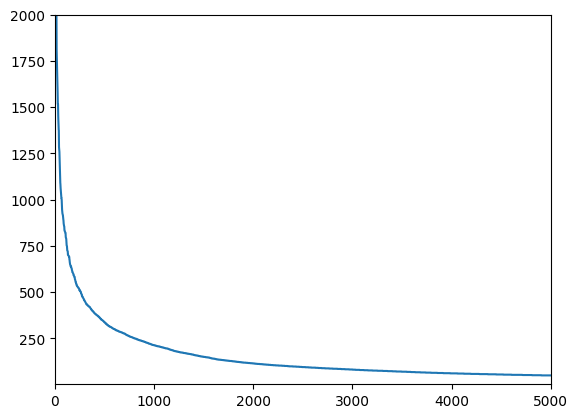

In [10]:
# ploating the graph word vs frequency
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(len(vocb)):
  x.append(i)
  y.append(vocb[i][1])
plt.axis([0,5000,1,2000])
plt.plot(x,y)
plt.show()

In [11]:
vocb[8000]

('king', 30)

In [12]:
# from the graph we are observing the after 4000 word there is very small frequency but still i get first 8000
# Just to increase the Acuracy and score It gave me the higher accurucy on this so... 
feature=[]
for i in range (0,8000):
  feature.append(vocb[i][0])
print(feature)

['1993', 'article', "don't", 'GMT\nLines:', 'Path:', 'people', 'Newsgroups:', 'Xref:', 'cantaloupe.srv.cs.cmu.edu', 'University', 'also', 'make', 'good', "it's", 'time', 'find', 'GMT\nOrganization:', "can't", 'back', 'work', "I've", 'GMT\nReferences:', 'Fri,', 'Tue,', 'made', "doesn't", 'problem', 'read', 'system', 'point', 'Computer', 'give', 'things', 'number', "didn't", 'Thu,', 'part', 'file', 'years', 'government', 'News', 'information', 'question', 'long', 'thing', 'GMT\nSender:', 'writes:\n>', 'Mon,', 'State', 'program', 'Wed,', 'found', 'fact', 'called', 'power', 'the\n', 'data', 'drive', 'real', 'heard', 'hard', '(USENET', 'When', "It's", 'year', "you're", 'reason', 'support', 'University,', 'That', "isn't", "that's", 'send', 'Windows', 'message', 'call', 'kind', 'means', 'makes', 'person', 'great', 'free', 'thought', 'Jesus', '\nthe', 'start', 'public', 'case', '(and', 'order', 'version', 'list', "I'll", '(David', 'game', 'idea', 'image', 'Turkish', 'world\nMessage-ID:', 'post

In [13]:
# now as pre the rule in the multinomial navie bayes we are going to make 2d table 
# where first row is the featur i.e thw word we are going to take 
# and after ward frequency of the word in deach document i
x_train_datasets=np.zeros([len(x_train),len(feature)],int)
for i in range(len(x_train)):
  document=x_train[i].split(' ')
  for j in document:
    if j in feature:
      x_train_datasets[i][feature.index(j)]+=1
x_train_datasets

array([[1, 3, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# similay for the testing datasets
x_test_datasets=np.zeros([len(x_test),len(feature)],int)
for i in range(len(x_test)):
  document=x_test[i].split(' ')
  for j in document:
    if j in feature:
      x_test_datasets[i][feature.index(j)]+=1

USING THE INBUILT MULTINOMILA FUNCTION

In [15]:
# exporting the requried librayies
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [16]:
# observing the accuracy and score of the inbulit mutinomial function
alg=MultinomialNB()
alg.fit(x_train_datasets,y_train)
y_predict=alg.predict(x_test_datasets)
print("Acuraccy of the INBUILT function of the multinomial classification : ",accuracy_score(y_test,y_predict))
# print("classification_report of the INBUILT function of the multinomial classification : ",classification_report(y_test,y_predict))
print("Score of the training data: ",alg.score(x_train_datasets,y_train))
print("Score of the testing data: ",alg.score(x_test_datasets,y_test))

Acuraccy of the INBUILT function of the multinomial classification :  0.8568
Score of the training data:  0.9268520370740815
Score of the testing data:  0.8568


In [17]:
print("confusion_matrix of the inbulit multinomila function: ")
print()
confusion_matrix(y_test,y_predict)

confusion_matrix of the inbulit multinomila function: 



array([[244,   0,   0,   1,   0,   0,   2,   0,   1,   0,   0,   0,   0,
          0,   0,   7,   1,   0,   2,  32],
       [  1, 188,  20,   3,   8,   3,   7,   1,   0,   0,   0,   2,   2,
          1,   3,   0,   0,   0,   0,   3],
       [  0,   4, 205,   8,   3,   5,   6,   1,   0,   0,   0,   0,   1,
          0,   1,   0,   0,   0,   0,   1],
       [  0,   2,  16, 206,   9,   1,  10,   4,   0,   0,   0,   0,   5,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   3,  12, 221,   0,  10,   0,   0,   0,   0,   0,   4,
          0,   1,   0,   0,   0,   0,   0],
       [  0,  10,  14,   1,   1, 197,   7,   0,   1,   0,   0,   1,   5,
          0,   1,   0,   0,   0,   0,   0],
       [  0,   1,   2,  10,   7,   1, 208,   6,   1,   0,   1,   0,   6,
          0,   2,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   8, 214,   9,   1,   0,   0,   6,
          1,   1,   0,   5,   0,   2,   0],
       [  0,   2,   0,   0,   0,   2,   3,   5, 250,   0,   0,  

BUILD OUR OWN MULTINOMIAL ALGORITHM

In [18]:
# FIT -> training the algorithm over training data
# Returns the dictionary that would be used to make predictions
def fit(x_train_dataset,y_train):
    count={} # Initialising dictionary which will be nested 
    #First Level of dictionary will contain the total number of classes and each class as its keys
    #Second level of dicitonary will contain total count of a class,total number of words in a class and number of words(features) of each class as their keys
    y_train=np.array(y_train) #Converting the list into numpy array
    classes=set(y_train) #This will give us all the different classes in the dataset
    count['total_number_of_classes']=len(y_train) # This will give us the total number of classes present in the dataset
    #Iterating through each class to calculate the number of words(features) of each class and total number of words present in a class
    for current_class in classes: 
        temp=0
        count[current_class]={} # Initialising the second level of nested dictionary
        x_train_current=x_train_dataset[(y_train==current_class)] # THis will only give the us the rows of the current class
        y_train_current=y_train[(y_train==current_class)]  
        count[current_class]["total_count_of_a_class"]=len(y_train_current)
        for i in range(len(feature)): # finding sum of values of all features in curent class
            count[current_class][i] = x_train_current[:,i].sum()
            temp+=count[current_class][i]
        count[current_class]["total_words_in_a_class"]=temp
    return count    

In [19]:
# PROBABILITY -> 
# dictionary[current_class]["total_count_of_a_class"] gives num of data points belonging to current class
# dictionary["total_number_of_classes"] gives total num of training data points
def probability(x,dic,current_class):
    output = np.log(dic[current_class]["total_count_of_a_class"]) - np.log(dic["total_number_of_classes"])
    for j in range(len(x)): 
            if x[j]==0: #Checking if the word is presnt in out vocab dictionary
                continue # IF not then continue
            #If present then we will calculate it's probability and sum it to the sum of each word probability in the test data    
            count_curr_class_equal_xj = dic[current_class][j] + 1
            count_curr_class = dic[current_class]["total_words_in_a_class"] + len(feature)
            curr_xj_prob = np.log(count_curr_class_equal_xj) - np.log(count_curr_class)
            output = output + curr_xj_prob
    
    return output


In [20]:
# Making prediction for one data point
#This function will return the best class with highest probability
def predict_for_single(x_test,dic):
    first_run=True
    classes=list(dic.keys()) # getting all the classes
    for i in classes: #Iterating through each  
        if i=="total_number_of_classes":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            best_class=i
            first_run=False
    return best_class

In [21]:
#Predicting the output class 
def predict(x_test,dic):
    y_pred=[] # Appending the predictions 
    for x in x_test: #Iterating through each test data point
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
#Calculating the score
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)   

In [23]:
# Fitting the data and getting the required dictionary
dictionary=fit(x_train_datasets,y_train)
dictionary[0].keys()

dict_keys(['total_count_of_a_class', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

In [24]:
y_pred=predict(x_test_datasets,dictionary) #Calling the predict function to get the predictions in y_pred list

In [25]:
print(y_pred) #printing the predictions

[np.int64(12), np.int64(7), np.int64(19), np.int64(16), np.int64(3), np.int64(15), np.int64(2), np.int64(14), np.int64(3), np.int64(14), np.int64(1), np.int64(18), np.int64(13), np.int64(18), np.int64(3), np.int64(7), np.int64(11), np.int64(14), np.int64(1), np.int64(10), np.int64(3), np.int64(13), np.int64(16), np.int64(13), np.int64(12), np.int64(15), np.int64(16), np.int64(17), np.int64(19), np.int64(14), np.int64(3), np.int64(11), np.int64(3), np.int64(15), np.int64(16), np.int64(7), np.int64(14), np.int64(11), np.int64(16), np.int64(14), np.int64(2), np.int64(0), np.int64(4), np.int64(9), np.int64(19), np.int64(8), np.int64(16), np.int64(17), np.int64(7), np.int64(14), np.int64(4), np.int64(12), np.int64(8), np.int64(2), np.int64(0), np.int64(8), np.int64(9), np.int64(0), np.int64(14), np.int64(1), np.int64(18), np.int64(14), np.int64(2), np.int64(4), np.int64(10), np.int64(12), np.int64(5), np.int64(5), np.int64(10), np.int64(16), np.int64(6), np.int64(12), np.int64(3), np.int64(

In [26]:
print("Score on testing_data:",score(y_test,y_pred)) # Calculating the score of our own MultinomialNB

Score on testing_data: 0.8638


In [27]:
#Printing the classification report and confusion matrix of our output/predictions
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[242   0   0   1   0   0   3   0   1   1   1   0   1   0   0   5   1   0
    2  32]
 [  0 196  13   2   6   2   7   1   0   0   0   3   5   1   3   0   0   0
    0   3]
 [  0   6 207   7   2   4   5   1   0   0   0   0   1   0   1   0   0   0
    0   1]
 [  1   1  15 210   9   1   9   4   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   1   2   8 226   1   9   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   9  15   0   1 198   7   1   1   0   0   1   5   0   0   0   0   0
    0   0]
 [  0   0   4   8   5   0 211   7   1   0   1   1   6   0   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   6 221   8   0   0   0   5   0   0   0   4   0
    3   0]
 [  0   3   0   1   0   1   2   4 250   0   0   0   3   0   1   0   0   0
    1   1]
 [  0   0   0   0   0   0   3   0   1 245   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1   3 233   0   1   0   0   0   0   0
    1   0]
 [  1   2   1   0   0   0   3   2   0   0   0 230   2   1   0   0

CONCLUSION

The predictions by sklearn's inbuilt Multinomial Naive Bayes and our own implemented code made from scratch show approximately the same results.
The results are based on score,classification report and confusion matrix.